In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util
from hierarchy import *

# Finding Tree Path Covers

In [2]:
def draw_tree(tree, layout, draw_path=True):
    rooted_tree = nx.bfs_tree(tree, 0)
    
    #nx.draw_networkx_nodes(tree, pos=layout, node_size=29)
    nx.draw_networkx_labels(tree, pos=layout, font_size=10, font_color="tab:blue")
    
    if draw_path:
        path_cover,_,X=util.path_cover(tree)
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in rooted_tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(rooted_tree, pos=layout)

### Bulk Testing with (0,1)-weights

In [ ]:
failure_count = 0
bad_trees = []
for i in range(1000):
    n = 100
    T = nx.random_labeled_tree(n)
    
    for s,t in T.edges():
        T[s][t]['weight'] = random.random()

    path, diff = util.path_cover(T)
    if not math.isclose(diff, 0.0, rel_tol=1e-4):
        failure_count += 1
        bad_trees.append(T)

In [ ]:
print(f'failures: {failure_count}')
bad_tree = bad_trees[0]
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0), draw_path=False)

In [ ]:
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0))

In [ ]:
util.path_cover(bad_tree)

In [ ]:
math.isclose(util.path_cover(bad_tree)[1],0.0,rel_tol=1e-4)

### Test Tree 2

In [ ]:
test_tree2 = nx.read_graphml('test2.graphml', node_type=int)

In [ ]:
draw_tree(test_tree2, hierarchyc_pos(test_tree2, 0))

In [ ]:
nx.get_edge_attributes(test_tree2, 'weight')

### Test Tree 1 [(0,1)-weights]

In [ ]:
test_tree = nx.read_graphml('test1.graphml', node_type=int)

In [ ]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0), draw_path=False)

In [ ]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0))

In [ ]:
nx.get_edge_attributes(test_tree, 'weight')

### Random tree with edge weights in [0,1)

In [ ]:
n = 30
tree = nx.random_labeled_tree(n)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

In [ ]:
layout = hierarchyc_pos(tree, 0)
draw_tree(tree, layout, draw_path=False)

In [ ]:
draw_tree(tree, layout)

In [ ]:
nx.get_edge_attributes(tree, 'weight')

### Unit edge weights

In [3]:
n=20
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

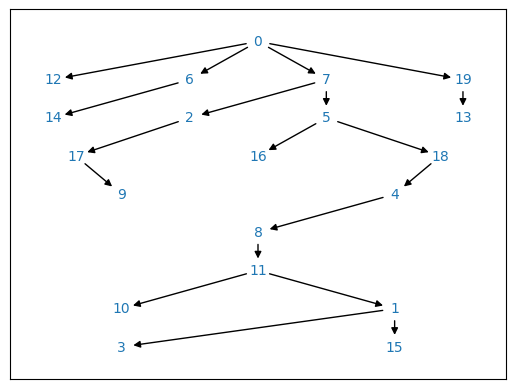

In [4]:
#ones_layout = nx.spring_layout(ones_tree)
ones_layout = hierarchye_pos(ones_tree, 0)
draw_tree(ones_tree, ones_layout, draw_path=False)

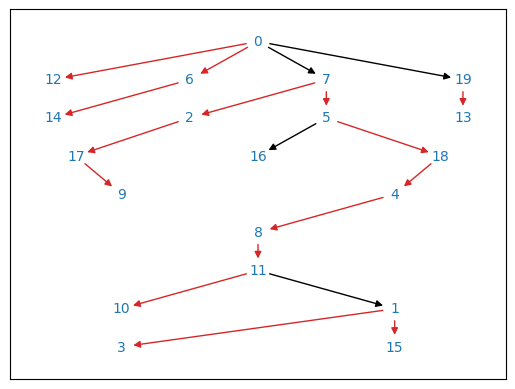

In [5]:
draw_tree(ones_tree, ones_layout)